# 6.2. Exploring Relationships of the Heart Attack Risk Prediction Dataset

This script contains the following:
1. Importing Visualization Libraries and Data
2. Exploring Relationships
 Correlations
 Scatterplots
 Pair Plots
 Categorical Plots

# 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check the version of matplotlib
matplotlib.__version__

'3.10.0'

In [3]:
# Creating path
path = r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\02 Data Profile\heart_attack_prediction_dataset_cleaned.csv"

# importing dataset
df = pd.read_csv(path)

In [4]:
# check what was imported
df.head

<bound method NDFrame.head of      Patient ID  Age  Gender  Cholesterol Level Blood Pressure  Heart Rate  \
0       BMW7812   67    Male                208         158/88          72   
1       CZE1114   21    Male                389         165/93          98   
2       BNI9906   21  Female                324         174/99          72   
3       JLN3497   84    Male                383        163/100          73   
4       GFO8847   66    Male                318          91/88          93   
...         ...  ...     ...                ...            ...         ...   
8758    MSV9918   60    Male                121          94/76          61   
8759    QSV6764   28  Female                120        157/102          73   
8760    XKA5925   47    Male                250         161/75         105   
8761    EPE6801   36    Male                178         119/67          60   
8762    ZWN9666   25  Female                356         138/67          75   

      Diabetes  Family Heart Prob

In [5]:
df.shape

(8763, 26)

In [6]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Cholesterol Level', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family Heart Problems', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Body Mass Index',
       'Triglyceride Levels', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk'],
      dtype='object')

# 2. Exploring Relationships

## Create a correlation matrix heatmap (colored)

In [7]:
# Create a subset excluding the 'Patient ID', 'Blood Pressure' and 'Diet' columns

sub = df[['Age', 'Gender', 'Cholesterol Level',
       'Heart Rate', 'Diabetes', 'Family Heart Problems', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Body Mass Index',
       'Triglyceride Levels', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Heart Attack Risk']]

In [8]:
sub

,Age,Gender,Cholesterol Level,Heart Rate,Diabetes,Family Heart Problems,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,Body Mass Index,Triglyceride Levels,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,Male,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,Female,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,Male,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,Male,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,235420,19.655895,67,7,7,0
8759,28,Female,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,217881,23.993866,617,4,9,0
8760,47,Male,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,36998,35.406146,527,4,4,1
8761,36,Male,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,209943,27.294020,114,2,8,0


In [9]:
# convert values in Gender into numerical: 1 - Male, 0 - Female
sub['Gender'] = sub['Gender'].map({'Male': 1, 'Female': 0})

C:\Users\ZenBook\AppData\Local\Temp\ipykernel_4572\281702140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Gender'] = sub['Gender'].map({'Male': 1, 'Female': 0})


In [10]:
sub

,Age,Gender,Cholesterol Level,Heart Rate,Diabetes,Family Heart Problems,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,Body Mass Index,Triglyceride Levels,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,1,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,1,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,0,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,1,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,1,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,1,7.917342,1,1,8,10.806373,235420,19.655895,67,7,7,0
8759,28,0,120,73,1,0,0,1,0,16.558426,0,0,8,3.833038,217881,23.993866,617,4,9,0
8760,47,1,250,105,0,1,1,1,1,3.148438,1,0,5,2.375214,36998,35.406146,527,4,4,1
8761,36,1,178,60,1,0,1,0,0,3.789950,1,1,5,0.029104,209943,27.294020,114,2,8,0


In [11]:
# Create a correlation matrix using pandas

sub.corr()

,Age,Gender,Cholesterol Level,Heart Rate,Diabetes,Family Heart Problems,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,Body Mass Index,Triglyceride Levels,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,0.020067,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403
Gender,0.020067,1.000000,0.007614,-0.010921,0.003582,0.002180,0.514837,0.002376,0.002085,-0.006976,0.001964,-0.007148,-0.021835,0.002995,0.002660,-0.003021,0.002933,-0.007660,-0.005329,0.003095
Cholesterol Level,-0.009107,0.007614,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340
Heart Rate,-0.003844,-0.010921,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251
Diabetes,-0.014105,0.003582,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225
Family Heart Problems,0.008353,0.002180,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652
Smoking,0.394891,0.514837,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051
Obesity,-0.008140,0.002376,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318
Alcohol Consumption,-0.006666,0.002085,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778
Exercise Hours Per Week,0.001206,-0.006976,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245,0.011133


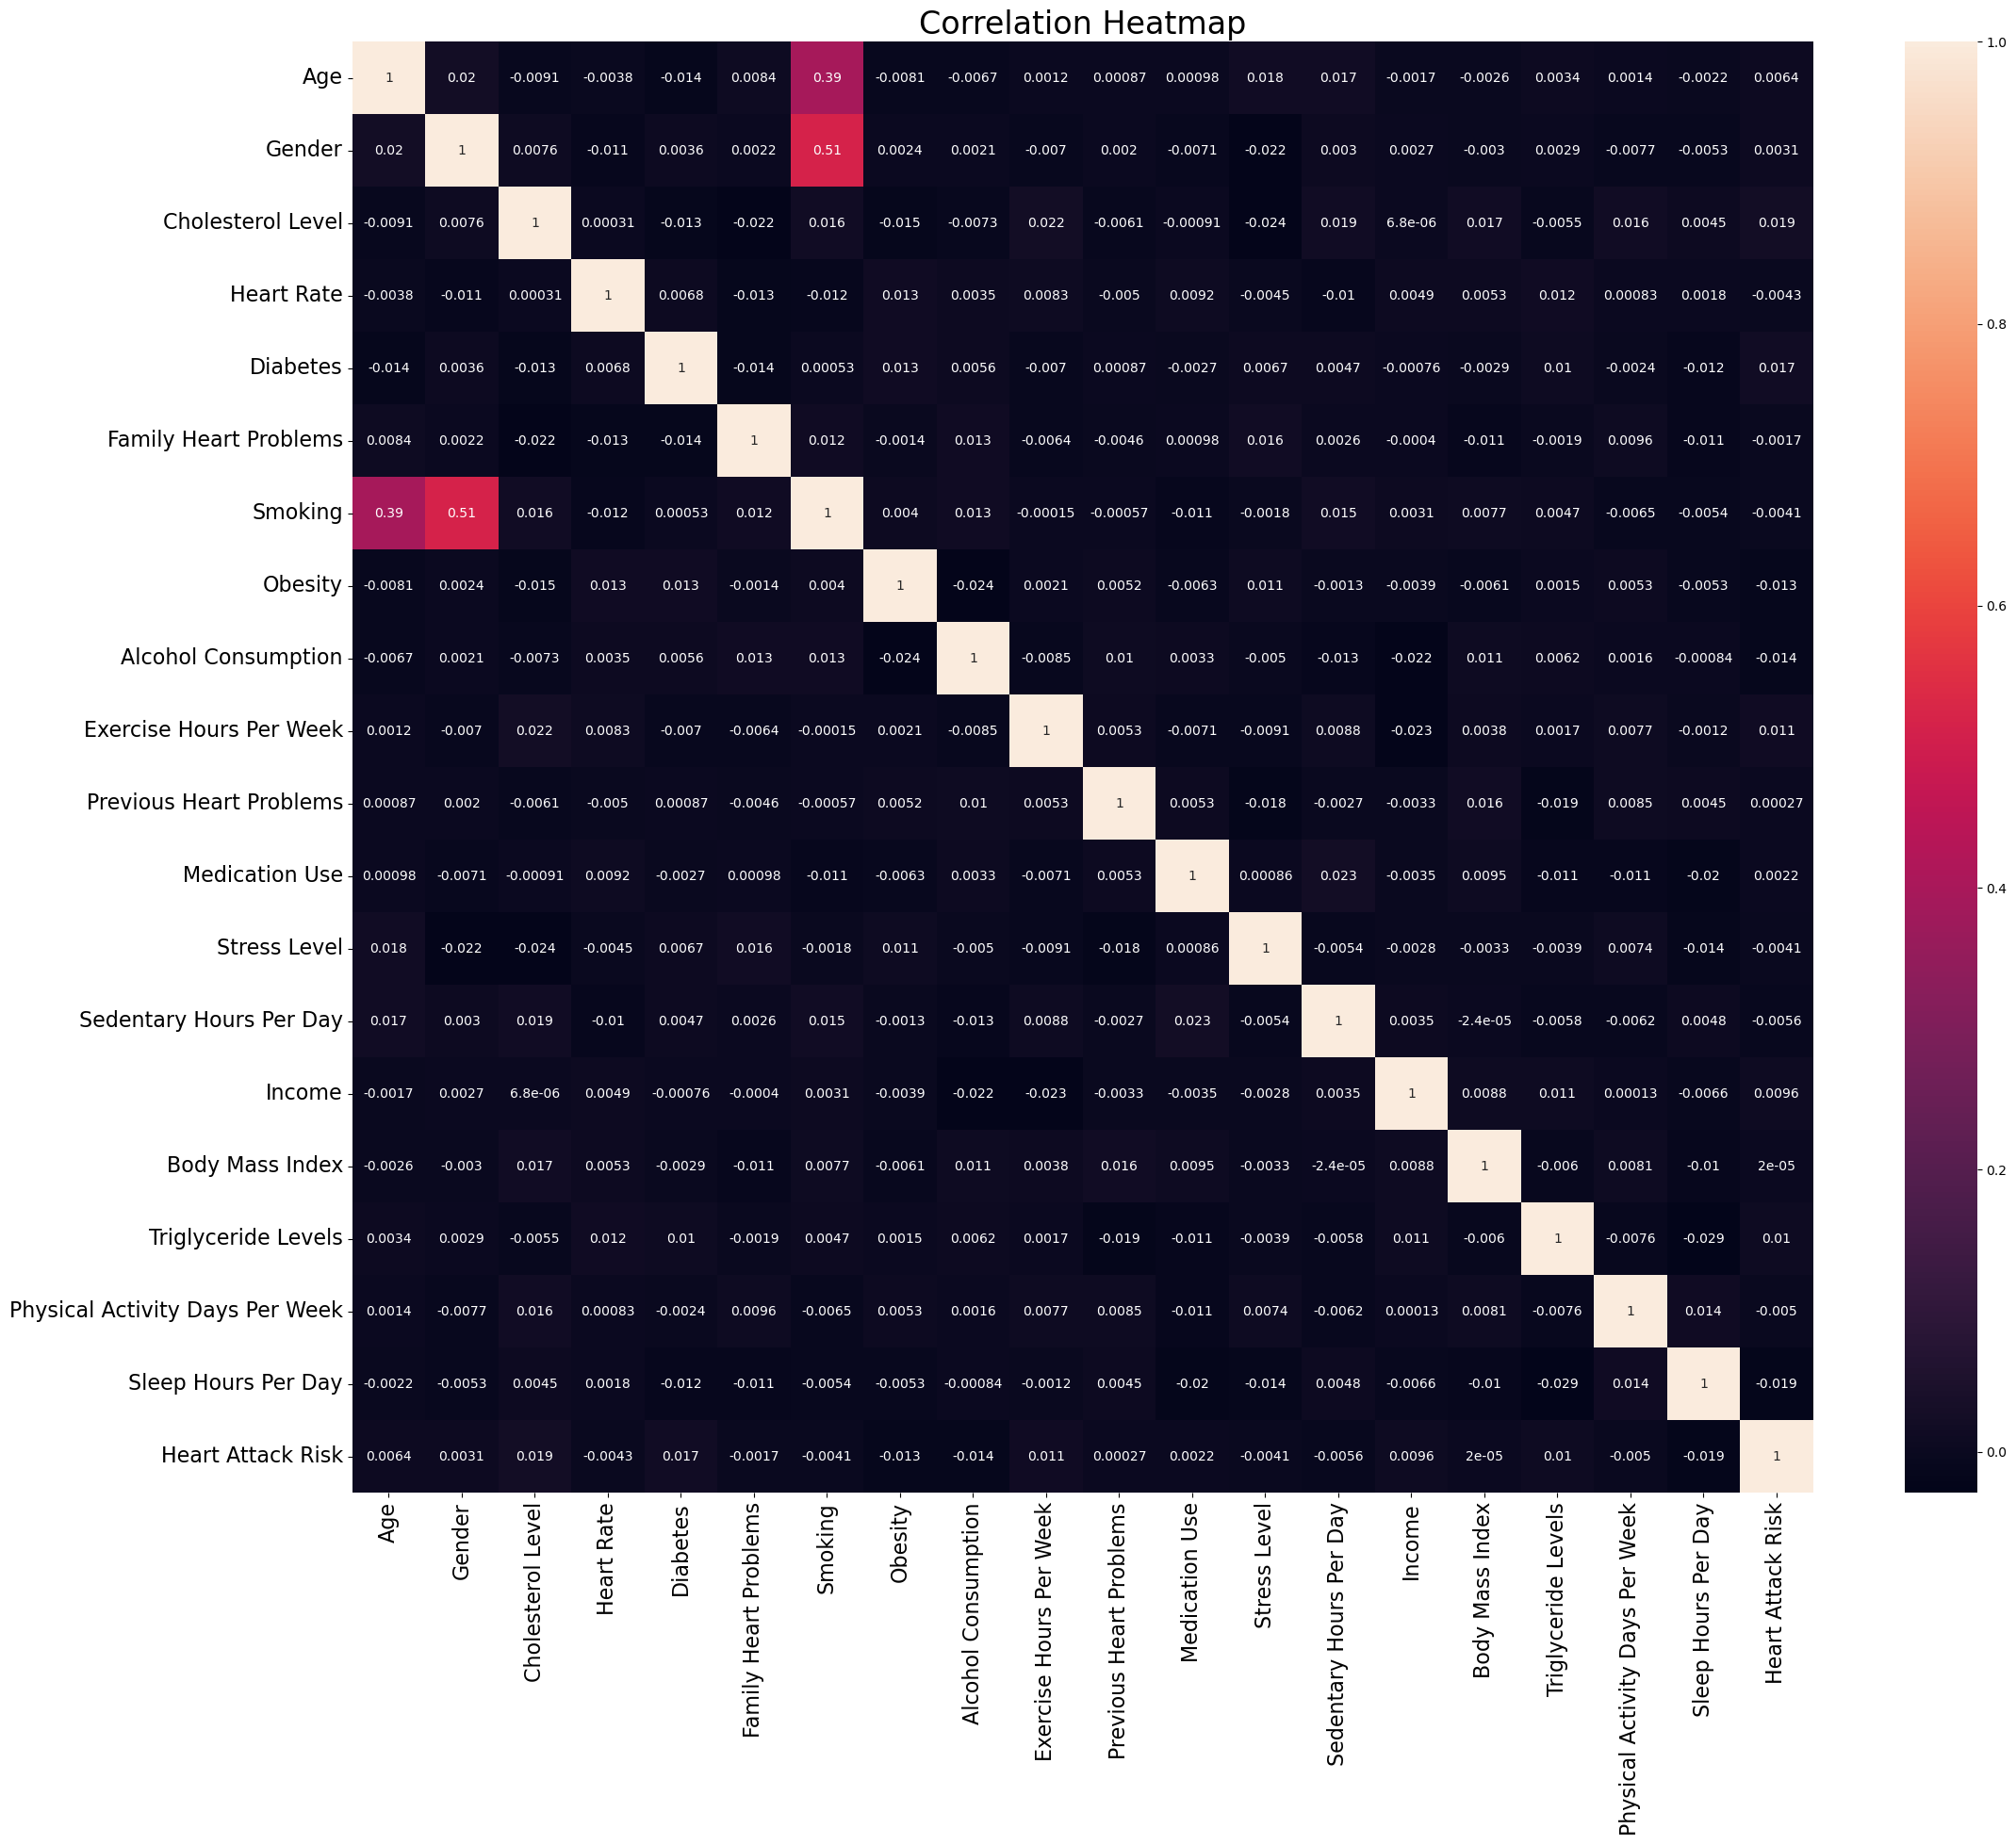

In [14]:
# Create a correlation heatmap using seaborn

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(25,20))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax=ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
plt.title('Correlation Heatmap', fontsize=24)
ax.tick_params(axis='both', labelsize=16)
plt.show()

# saving the figure
f.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Correlation Heatmap.png", dpi=400, bbox_inches='tight')

## Correlation Heatmap Interpretation
- A correlation of 0.39 between Smoking and Age suggests that older individuals in the dataset are moderately more likely to smoke.
- The 0.51 moderate correlation between Smoking and Gender indicates that men are noticeably more likely to smoke than women.
- There are a very weak negative relationship between Heart Rate, Family Hear Problems, Smoking, Obesity, Alcohol Consumption, Stress Level, Sedentary Hours Per Day, Physical Activity Days Per Week, Sleep Hours Per Day and Heart Attack Risk (−0.0043, −0.0017, −0.0041, −0.013, −0.014, −0.0041, −0.0056, -0.005, -0.019, accordingly) indicating no meaningful linear relationship between mentioned parameters and heart attack risk based on data from this dataset (despite the common medical knowledge linking some of them to cardiovascular issues).

## Create a scatterplot 

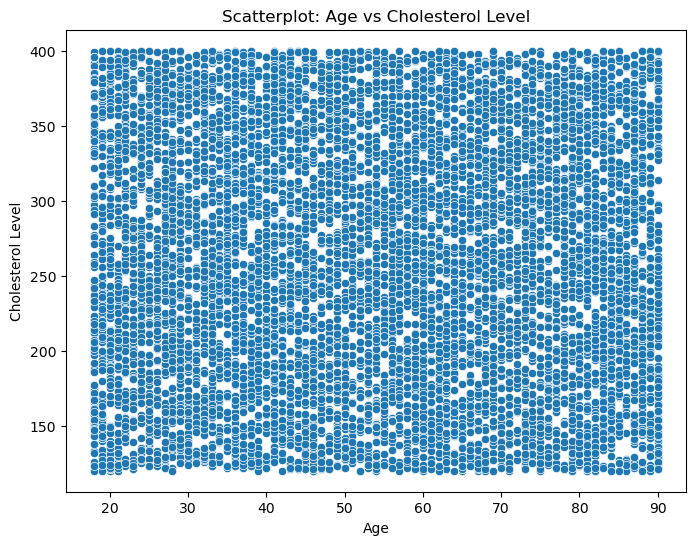

<Figure size 640x480 with 0 Axes>

In [17]:
#  Create a Scatterplot Age vs Cholesterol Level

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Cholesterol Level')
plt.title('Scatterplot: Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

# saving the figure
plt.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Scatterplot_Age_vs_Cholesterol.png", dpi=400, bbox_inches='tight')

## Scatterplot: Age vs Cholesterol Level Interpretation
- The plot shows a wide spread of cholesterol levels across all ages, suggesting no strong linear relationship between age and cholesterol level.
- The dense clustering of dots indicates a large dataset, with many individuals represented across the age spectrum.
- Most data points fall between ages 20 and 90, showing that the dataset covers a broad adult population.
- Cholesterol levels range from 100 to 450, with noticeable variation at all ages: implying that cholesterol is influenced by more than just age (maybe diet, genetics, or lifestyle).
- While there's no clear upward or downward trend, there are slight increases in cholesterol among older individuals, though it's not consistent enough to suggest a strong correlation.

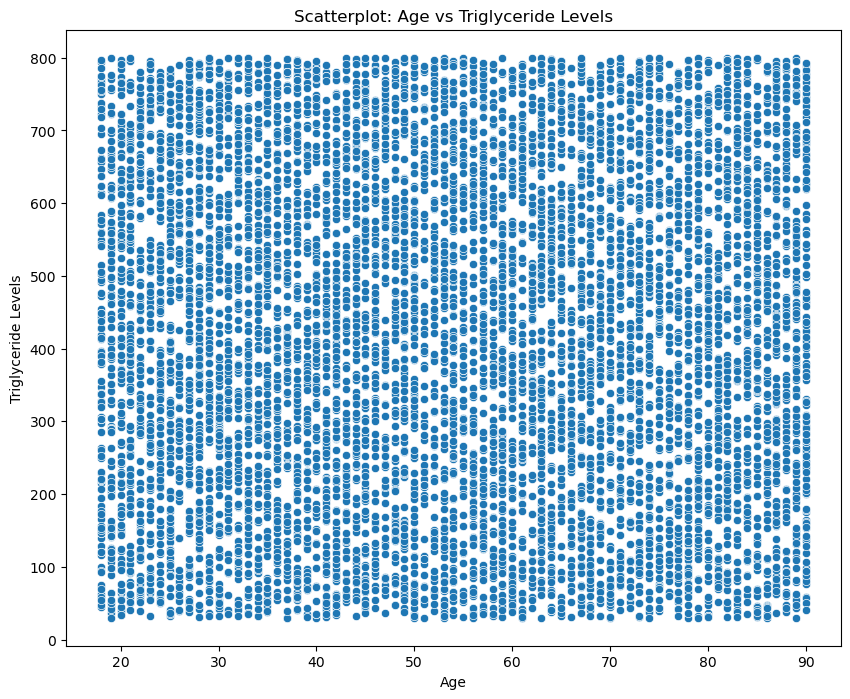

<Figure size 640x480 with 0 Axes>

In [18]:
#  Create a Scatterplot Age vs Triglyceride Levels

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Triglyceride Levels')
plt.title('Scatterplot: Age vs Triglyceride Levels')
plt.xlabel('Age')
plt.ylabel('Triglyceride Levels')
plt.show()

# saving the figure
plt.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Scatterplot_Age_vs_Triglyceride.png", dpi=400, bbox_inches='tight')

## Scatterplot: Age vs Triglyceride Levels Interpretation
- Triglyceride levels span from 0 to 800, showing significant variation across individuals regardless of age.
- The scatterplot does not show a strong upward or downward pattern, suggesting that age alone does not predict triglyceride levels in a linear way.
- Data points are spread across all age groups (20–90), indicating a diverse population sample.
- Some individuals have extremely high triglyceride levels, which may warrant further investigation for medical or lifestyle factors.
- Triglyceride levels are likely influenced by multiple factors beyond age such as diet, physical activity, genetics, or metabolic conditions.

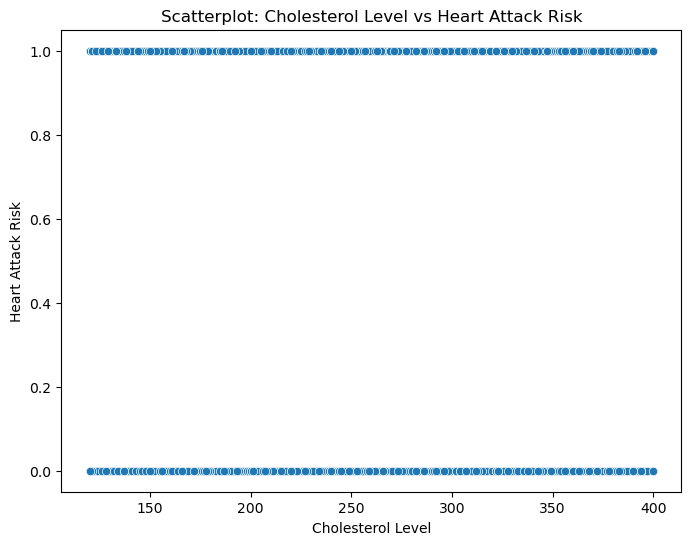

<Figure size 640x480 with 0 Axes>

In [19]:
#  Create a Scatterplot Cholesterol Level vs Heart Attack Risk

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cholesterol Level', y='Heart Attack Risk')
plt.title('Scatterplot: Cholesterol Level vs Heart Attack Risk')
plt.xlabel('Cholesterol Level')
plt.ylabel('Heart Attack Risk')
plt.show()

# saving the figure
plt.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Scatterplot_Cholesterol_vs_Heart_Attack_Risk.png", dpi=400, bbox_inches='tight')

## Scatterplot: Cholesterol Level vs Heart Attack Risk Interpretation
- The y-axis shows only two values — 0 and 1 — indicating a binary classification for heart attack risk (0 = low/no risk, 1 = high risk).
- Data points are spread horizontally along these two levels, showing how cholesterol levels vary within each risk group.
- There's significant overlap in cholesterol levels between the two groups, meaning individuals with both low and high heart attack risk can have similar cholesterol values.
- Cholesterol level alone may not be a strong predictor of heart attack risk in this dataset. Other variables (like smoking, stress, or diabetes) might be needed to improve prediction accuracy.

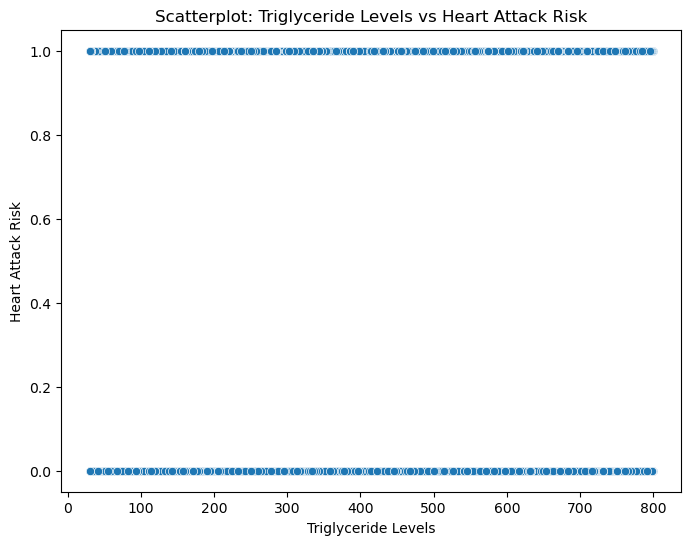

<Figure size 640x480 with 0 Axes>

In [20]:
#  Create a Scatterplot Triglyceride Levels vs Heart Attack Risk

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Triglyceride Levels', y='Heart Attack Risk')
plt.title('Scatterplot: Triglyceride Levels vs Heart Attack Risk')
plt.xlabel('Triglyceride Levels')
plt.ylabel('Heart Attack Risk')
plt.show()

# saving the figure
plt.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Scatterplot_Tryglyceride_vs_Heart_attack_risk.png", dpi=400, bbox_inches='tight')

## Scatterplot: Triglyceride Levels vs Heart Attack Risk Interpretation
- The y-axis shows only two values — 0 and 1 — representing individuals with low/no risk and high risk of heart attack, respectively.
- Data points are spread horizontally across triglyceride levels for both risk categories, indicating that high and low risk individuals can have similar triglyceride levels.
- There's no obvious cutoff point in triglyceride levels that separates the two groups, suggesting that triglyceride levels alone may not be a reliable predictor of heart attack risk.
- The overlap between the two groups implies that other factors (e.g., stress, smoking, diabetes) may be needed to explain or predict heart attack risk more accurately.

## Create a Pair Plot

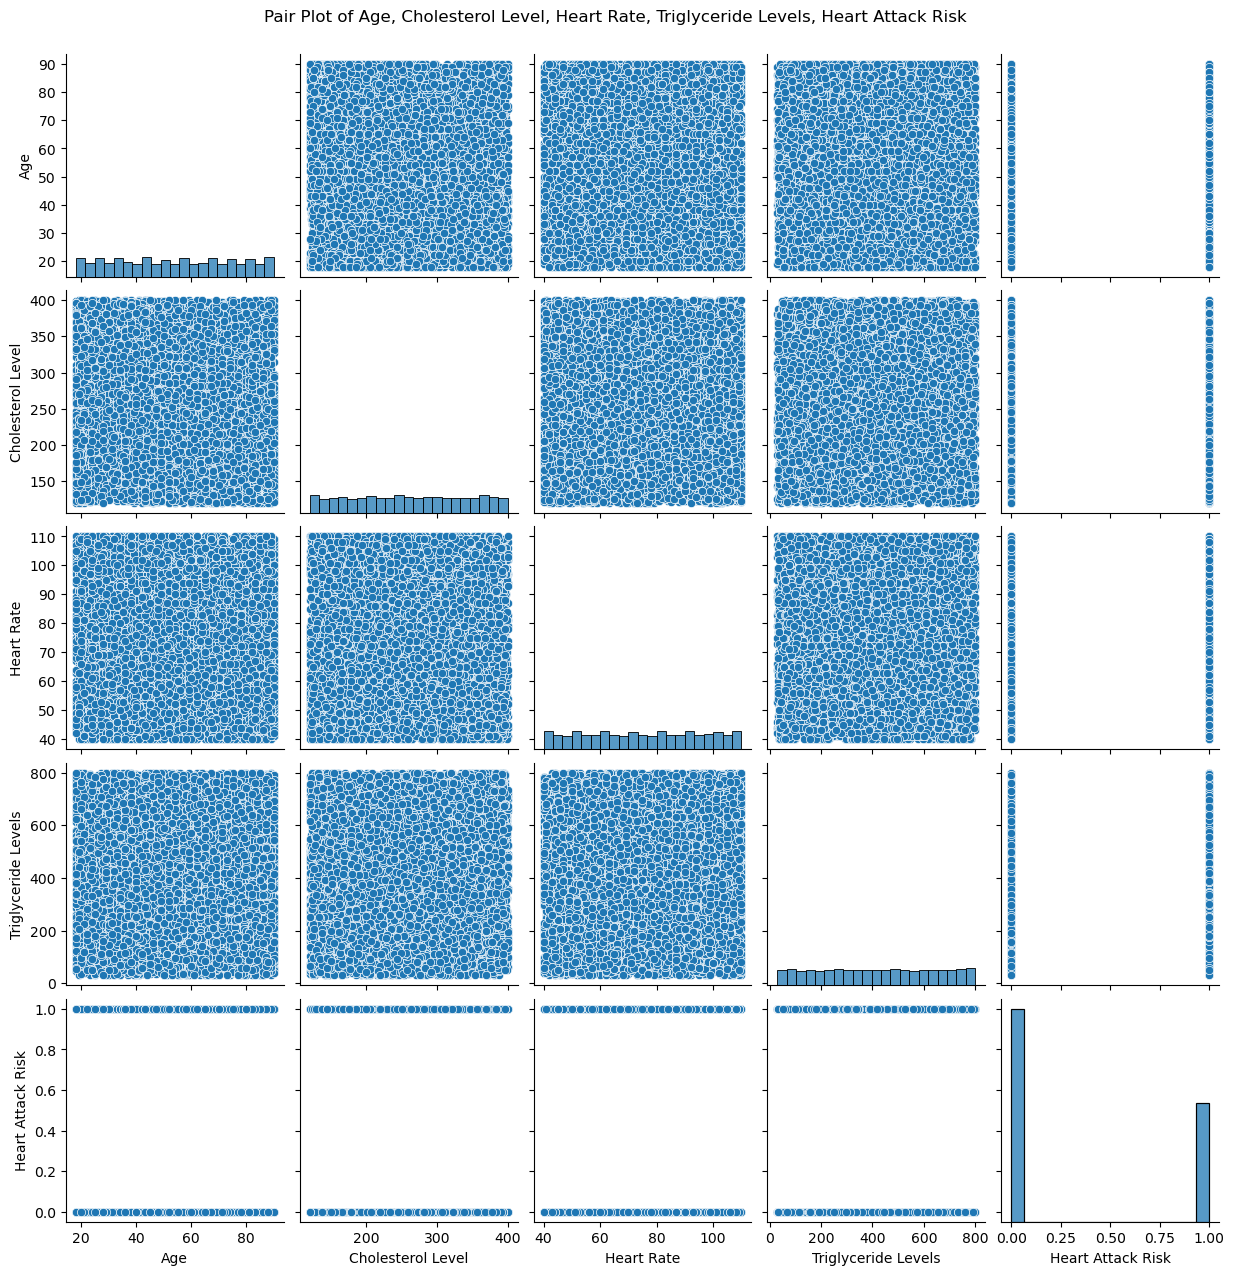

<Figure size 640x480 with 0 Axes>

In [21]:
# Pair Plot
sns.pairplot(df[['Age', 'Cholesterol Level', 'Heart Rate','Triglyceride Levels', 'Heart Attack Risk']])
plt.suptitle('Pair Plot of Age, Cholesterol Level, Heart Rate, Triglyceride Levels, Heart Attack Risk', y=1.02)
plt.show()

# saving the figure
plt.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Pair_Plot_Age_Cholesterol_HeartRate_Triglyceride_Heart_attack_risk.png", dpi=400, bbox_inches='tight')

## Pair Plot Interpretation

- Each diagonal cell shows the histogram distribution of a single variable: Age and Heart Rate appear fairly spread out, suggesting a diverse sample; Heart Attack Risk is binary (0 or 1), confirming it's a classification target.
- Age vs Cholesterol / Triglycerides: these scatterplots show no strong linear trend, but some clustering may suggest that older individuals tend to have slightly higher lipid levels.
- Cholesterol vs Triglyceride Levels: this pairing shows a positive relationship, meaning individuals with high cholesterol often also have high triglycerides, which is a common pattern in metabolic health.
- Heart Rate vs Heart Attack Risk: no clear separation is visible, implying that heart rate alone may not be a strong predictor of heart attack risk.
- Cholesterol / Triglycerides vs Heart Attack Risk: both show overlapping distributions across risk categories, suggesting that while these factors may contribute, they don’t clearly distinguish between low and high risk on their own.

## Categorical Plot

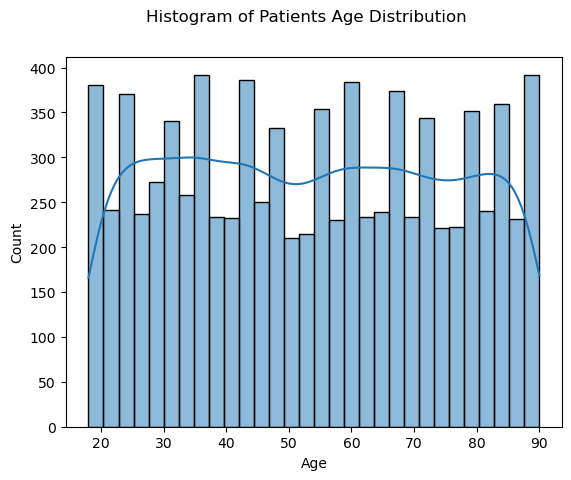

<Figure size 640x480 with 0 Axes>

In [22]:
# Creating a categorical variable that splits the "Age" column into categories
sns.histplot(df['Age'], bins = 30, kde = True)
plt.suptitle('Histogram of Patients Age Distribution')
plt.show()

# saving the figure
plt.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Histog_patient_age_distrib.png", dpi=400, bbox_inches='tight')

In [23]:
df.loc[df['Age'] < 25, 'Age category'] = 'Juvenals'

In [24]:
df.loc[(df['Age'] >= 25) & (df['Age'] <= 39), 'Age category'] = 'Primocardials'

In [25]:
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'Age category'] = 'Maturals'

In [26]:
df.loc[(df['Age'] >= 60) & (df['Age'] <= 90), 'Age category'] = 'Senocardials'

In [27]:
df['Age category'].value_counts(dropna = False)

Age category
Senocardials     3679
Maturals         2357
Primocardials    1867
Juvenals          860
Name: count, dtype: int64

In [28]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Cholesterol Level', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family Heart Problems', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Body Mass Index',
       'Triglyceride Levels', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk', 'Age category'],
      dtype='object')

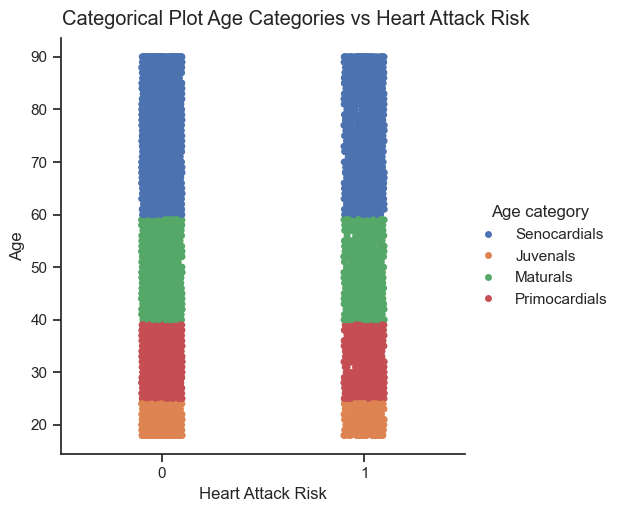

<Figure size 640x480 with 0 Axes>

In [29]:
# Create a categorical plot in seaborn using the Age categories created before

sns.set(style="ticks")
g = sns.catplot(x="Heart Attack Risk", y="Age", hue="Age category", data=df)
plt.suptitle('Categorical Plot Age Categories vs Heart Attack Risk', y=1.02)
plt.show()

# saving the figure
plt.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Categor_plot_heart_attack_risk_by_age_categ.png", dpi=400, bbox_inches='tight')

## Interpretation of the Categorical Plot Age Categories vs Heart Attack Risk
- It visually challenging to compare risk levels across different Age categories.
- The plot uses color to represent age categories, but it doesn't separate them.
- The x-axis (Heart Attack Risk) only has two categories (0 and 1), so dots overlap heavily.
- There's no count, density, or proportion shown - just raw scatter, which makes it hard to judge which group has more individuals at risk.

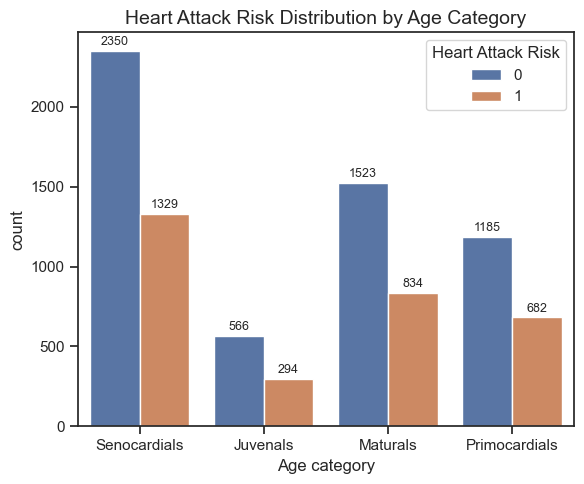

<Figure size 640x480 with 0 Axes>

In [31]:
# check counts per group.

plt.figure(figsize=(6, 5))
ax = sns.countplot(x="Age category", hue="Heart Attack Risk", data=df)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)
plt.title("Heart Attack Risk Distribution by Age Category", fontsize=14)
plt.tight_layout()
plt.show()

# saving the figure
plt.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\heart_attack_risk_by_age_categ.png", dpi=400, bbox_inches='tight')

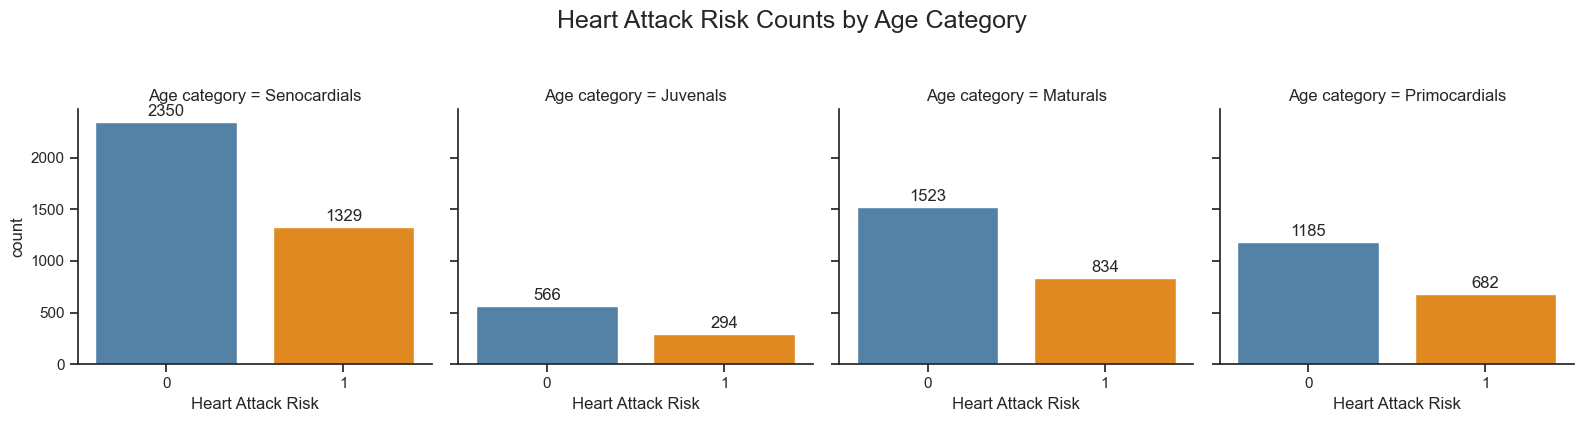

In [32]:
# trying separates each age category into its own subplot

sns.set(style="ticks")
df["Heart Attack Risk"] = df["Heart Attack Risk"].astype(str)
palette = {'0': 'steelblue', '1': 'darkorange'}

g = sns.catplot(
    x="Heart Attack Risk",
    hue="Heart Attack Risk",
    col="Age category",
    data=df,
    kind="count",
    palette=palette,
    height=4,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=12, padding=2)

g.fig.suptitle("Heart Attack Risk Counts by Age Category", fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

# saving the figure
g.fig.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Bar_heart_attack_risk_by_age_categ.png", dpi=400, bbox_inches='tight')

## Interpretations Heart Attack Risk Counts by Age Category
- Senorotals (60-90 years) have the highest number of individuals at risk (1329), indicating that older age groups carry the greatest burden of heart attack risk.
- Maturals (40-59 years) and Primocardials (26-39 years) show very close patterns, with moderate counts and a substantial portion of individuals at risk, suggesting these middle-aged groups are at slightly lower-risk.
- Juvenals (15-25 years) have the lowest overall risk count (294), reinforcing that younger individuals are least affected by heart attack risk accourding to analysed dataset.

## Catogorical Plot for the Exercise Hours Per Week

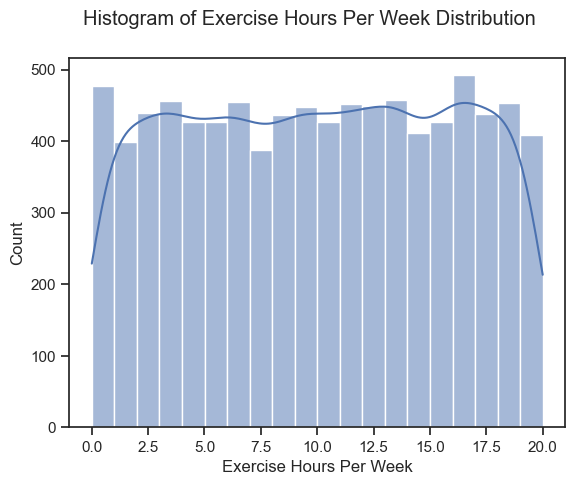

<Figure size 640x480 with 0 Axes>

In [33]:
# Creating a categorical variable that splits the "Exercise Hours Per Week" column into categories

sns.histplot(df['Exercise Hours Per Week'], bins = 20, kde = True)
plt.suptitle('Histogram of Exercise Hours Per Week Distribution')
plt.show()

# saving the figure
plt.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Histogr_heart_attack_risk_by_exercise_hpw.png", dpi=400, bbox_inches='tight')

In [34]:
df.loc[df['Exercise Hours Per Week'] < 4, 'Exercise HPW category'] = 'Low Activity'

In [35]:
df.loc[(df['Exercise Hours Per Week'] >= 4) & (df['Exercise Hours Per Week'] <= 10), 'Exercise HPW category'] = 'Moderate Activity'

In [36]:
df.loc[(df['Exercise Hours Per Week'] >= 10) & (df['Exercise Hours Per Week'] <= 19.99), 'Exercise HPW category'] = 'High Activity'

In [37]:
df['Exercise HPW category'].value_counts(dropna = False)

Exercise HPW category
High Activity        4409
Moderate Activity    2579
Low Activity         1771
NaN                     4
Name: count, dtype: int64

In [38]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Cholesterol Level', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family Heart Problems', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Body Mass Index',
       'Triglyceride Levels', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk', 'Age category', 'Exercise HPW category'],
      dtype='object')

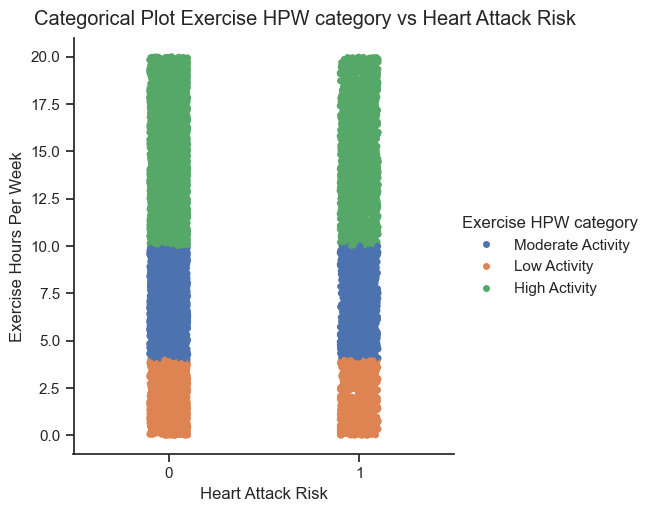

In [39]:
# Create a categorical plot in seaborn using the Exercise HPW category created before

sns.set(style="ticks")
g = sns.catplot(x="Heart Attack Risk", y="Exercise Hours Per Week", hue="Exercise HPW category", data=df)
plt.suptitle('Categorical Plot Exercise HPW category vs Heart Attack Risk', y=1.02)
plt.show()

# saving the figure
g.fig.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Categorical_plot_heart_attack_risk_by_exercise_categ.png", dpi=400, bbox_inches='tight')

## Interpretation of the Categorical Plot Exercise HPW category vs Heart Attack Risk
- It visually challenging to compare risk levels across different Exercise HPW categories.
- The plot uses color to represent age categories, but it doesn't separate them.
- The x-axis (Heart Attack Risk) only has two categories (0 and 1), so dots overlap heavily.
- It is hard to judge which group has more individuals at risk.

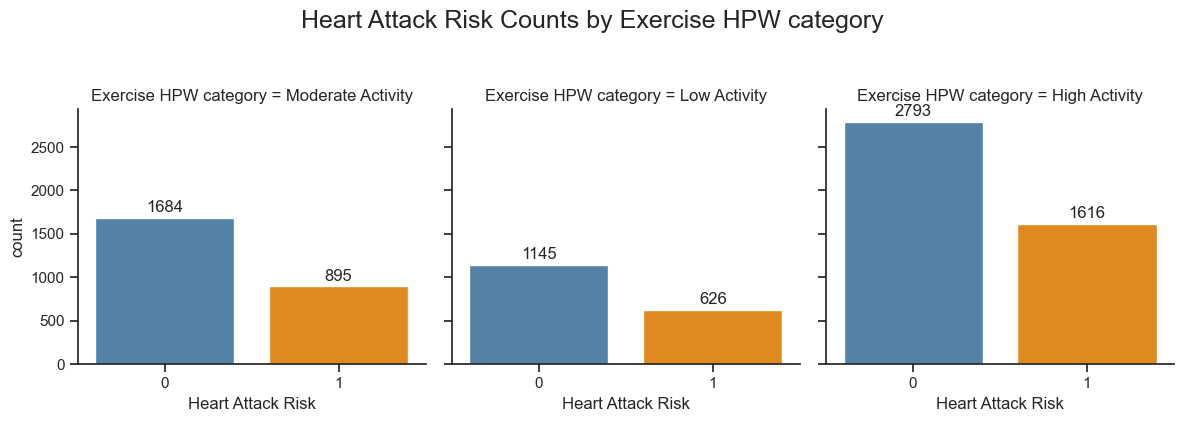

In [40]:
# trying separates each age category into its own subplot

sns.set(style="ticks")
df["Heart Attack Risk"] = df["Heart Attack Risk"].astype(str)
palette = {'0': 'steelblue', '1': 'darkorange'}

g = sns.catplot(
    x="Heart Attack Risk",
    hue="Heart Attack Risk",
    col="Exercise HPW category",
    data=df,
    kind="count",
    palette=palette,
    height=4,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=12, padding=2)

g.fig.suptitle("Heart Attack Risk Counts by Exercise HPW category", fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

# saving the figure
g.fig.savefig(r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\04 Analysis\Visualizations\Bar_heart_attack_risk_by_exercise_categ.png", dpi=400, bbox_inches='tight')

## Interpretation bar chart Heart Attack Risk Counts by Exercise HPW category
- Individuals with High Activity (more than 10 hours per week) show the highest counts in both risk and no-risk categories, suggesting this group is the most represented in the dataset.
- Moderate activity participants (4–10 hours/week) have a higher proportion of individuals at risk compared to Low Activity and High Activity groups, indicating that moderate exercise alone may not be protective according to analysed dataset.
- Low activity individuals (0–4 hours/week) show the lowest overall counts, but still maintain a notable number of at-risk cases, reinforcing that limited physical activity may be associated with increased vulnerability.

# Revising Business Questions
1. Which features are most correlated with heart attack risk?
Based on the correlation matrix, none of the examined features show a meaningful linear relationship with heart attack risk. Despite common medical assumptions, variables like smoking, stress, and obesity have very weak correlations in this dataset.
Alternatively, could be changed to “Are there any unexpected patterns or weak predictors of heart attack risk in this data?”

2. How does heart attack risk vary across age groups? 
Older individuals (Senorotals, 60–90 years) show the highest heart attack risk, middle-aged groups (Maturals and Primocardials) display moderate risk levels, while younger individuals (Juvenals, 15–25 years) are least affected according to the analyzed dataset.

3.  Is there a relationship between cholesterol levels and heart attack risk?
Based on the scatterplot, cholesterol levels show substantial overlap between risk groups, indicating that cholesterol alone is not a strong predictor of heart attack risk in this dataset.

4. Do lifestyle factors (e.g., Exercise Hours Per Week) significantly impact risk?
Based on the dataset and visual analysis, lifestyle factors like Exercise Hours Per Week do not show a strong or consistent impact on heart attack risk.

# New Questions Arising from Early Findings
- Why do medically recognized risk factors (e.g., smoking, stress, obesity) show weak correlations with heart attack risk in this dataset?
- Could the binary classification of heart attack risk be oversimplifying relationships that would emerge with a continuous risk score?
- Are there latent interactions between variables (e.g., age × smoking, stress × sleep) that influence risk more than individual features alone?
- Does data imbalance or sampling bias affect the visibility of true predictors?
- How do gender-specific patterns influence the relationship between lifestyle and heart attack risk?

# Hypotheses
1. Age is a probably primary driver of Heart Attack Risk, with older individuals showing significantly higher risk levels — this trend is visible, but should be validated with statistical tests and modeling.
2. Cholesterol Level alone do not reliably predict Heart Attack Risk, as substantial overlap exists between risk groups — further analysis could explore nonlinear relationships or thresholds.
3. Exercise Hours Per Week shows inconsistent impact on Heart Attack Risk, suggesting that physical activity may only influence outcomes when combined with other lifestyle or health factors.

In [41]:
# Define a path
relation_path = r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\02 Data Profile\heart_attack_prediction_dataset_clean_relations.csv"

# Save the cleaned dataset
df.to_csv(relation_path, index=False)

print(f"New data saved to: {relation_path}")

New data saved to: C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\02 Data Profile\heart_attack_prediction_dataset_clean_relations.csv
